# Exploratory Data Analysis(EDA) of Haberman's Survival Dataset

# (1.1) Basic Terminology

In [1]:
#import all important libraries that will be utilised.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load haberman.csv into pandas Data Frame named here as HMan

HMan = pd.read_csv('haberman.csv')

In [3]:
# Q.How many data points and feature are present?
print(HMan.shape)

(306, 4)


**Conclusion**
* The dataFrame consists data of total 306 partients and has 4 attributes.
* The data set is quite small.

In [4]:
# Q.What are the colomn names in our dataset
print(HMan.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


# Attribute Information of Haberman's Dataset

1. age- Age of patient at time of operation.
2. year- Year of operation.
3. nodes-  The number of positive axillary nodes detected.
4. status- Survival status of the patient.
    * 1 depicts patient survied for 5 years or longer.
    * 2 depicts that the patient survived for less than 5 years.

# Objective
* The objective is to predict whether the patient will survive the diagnosis for more than five years or less than 5 years after the operation based on the data such as:
     * Age of patient
     * Year of operation
     * Number of auxilary nodes found.

In [5]:
# Q.How many data point or each class is present? or
# Q.How many patient survive or each survival status?
HMan['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

**Conclusions**
* Out of 306 patients 225 patients survived for 5 or more years.
* Out of 306 patients 81 patients survived for less than 5 years.
* From the data set of 306 patients success of diagnosis is 73.5% approx.
* From the data set of 306 patients failure of diagnosis is 26.6% approx.
* The data set is quite imbalanced.

# (1.2) 2-D Scatter Plot

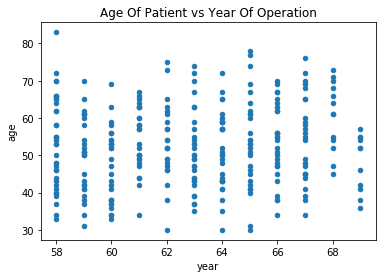

In [6]:
#2-D scatter plot (AgeOfPatient vs YearOfOperation)
HMan.plot(kind='scatter', x='year', y='age') 
plt.title('Age Of Patient vs Year Of Operation')
plt.show()

**Conclusions**
* Much cannot be inferred from the plot
* All the operation performed are done on patients of age between 30 to 83
* There were less operations in the year 68 and beyond as the concentration of points is very bleak compared to other years.

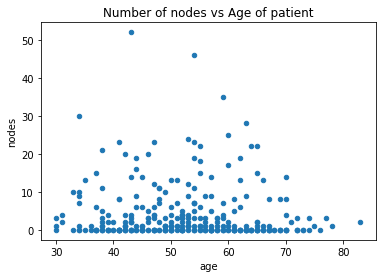

In [7]:
#2-D scatter plot(NumberOfNodes vs AgeOfPatient)
HMan.plot(kind='scatter', x='age', y='nodes') ;
plt.title('Number of nodes vs Age of patient')
plt.show()

**Conclusions**
* The maximum number of auxilary nodes found is somewhere around 52 or 53.
* The patient with maximum auxilary nodes ages around 43 years of age.
* Maximum number of patients have 5 or less  auxilary nodes.

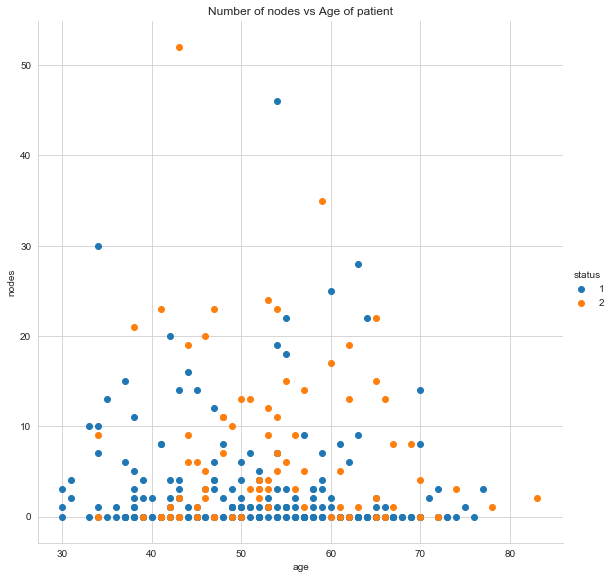

In [8]:
#2-D scatter plot with color coding(AuxilaryNodes vs Status)
sns.set_style("whitegrid");
sns.FacetGrid(HMan, hue="status", size=8).map(plt.scatter, "age", "nodes").add_legend()
plt.title('Number of nodes vs Age of patient')
plt.show();

**Conclusions**
* Patients aged above 48 with 10 or more auxilary nodes have higher chances of not surviving.
* Patients with 20 or above auxilary nodes or more have higher chances of not surving. 
* People with less number nodes have higher chance of survival.
* People with high number of nodes have less chance of survival.

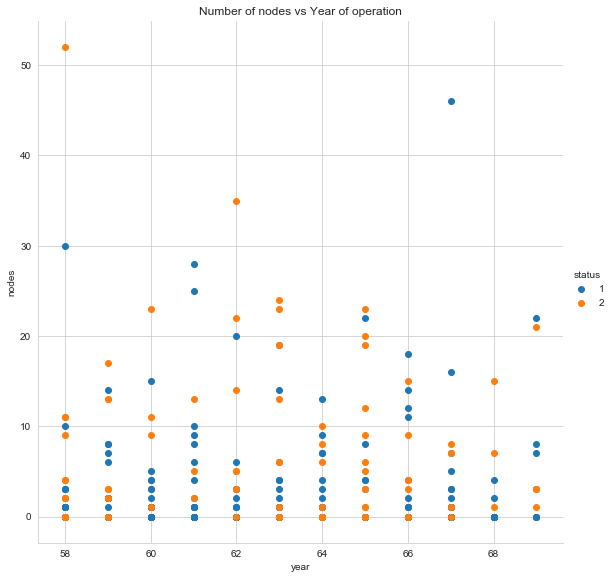

In [9]:
#2-D scatter plot with color coding(NumberOfNodes vs YearOfOperation)
sns.set_style("whitegrid");
sns.FacetGrid(HMan, hue="status", size=8).map(plt.scatter, "year", "nodes").add_legend()
plt.title('Number of nodes vs Year of operation')
plt.show();

**Conclusions**
* Most of the operation done in the year 65 were unsuccessful.
* Most of the oeration done in the year 60 and 61 were successful.

# (1.3) Pair-plot

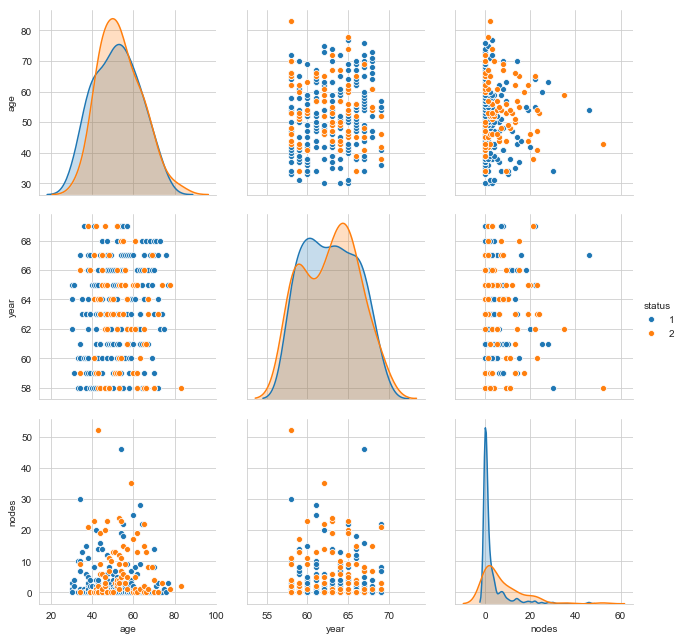

In [10]:
#Pair Plot
plt.close();
sns.set_style("whitegrid");
sns.pairplot(HMan, hue="status", vars=['age','year','nodes'], size=3);
plt.show()

**Conclusion**
* The pair plot does not give much clarity. 

# (1.4) Histogram,PDF,CDF

## (1.4.1) Histogram

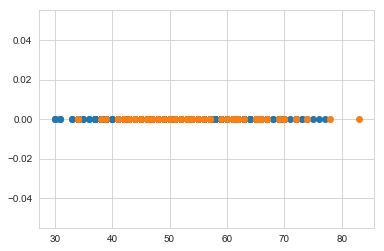

In [11]:
#1-D scatter plot
HMan_1 = HMan.loc[HMan["status"] == 1];
HMan_2 = HMan.loc[HMan["status"] == 2];

#print(HMan_1["age"])
plt.plot(HMan_1["age"], np.zeros_like(HMan_1['age']), 'o')

#print(HMan_2["age"])
plt.plot(HMan_2["age"], np.zeros_like(HMan_2['age']), 'o')

plt.show()

**Conclusion**
* The 1-D scatter plot shows too much of overlapping so nothing can be concluded from the plot.

## (1.4.2) PDF

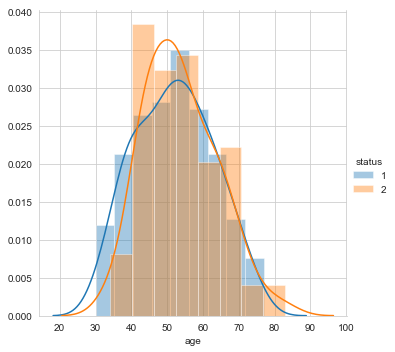

In [12]:
#Univariate analysis using PDF
sns.FacetGrid(HMan, hue="status", size=5).map(sns.distplot, "age").add_legend();
plt.show()

**Conclusion**

- Nothing much can be concluded from the histogram of age as there is overlapping of the status.

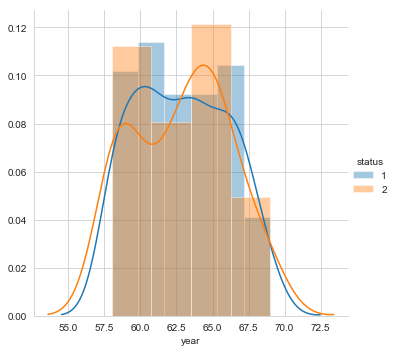

In [13]:
sns.FacetGrid(HMan, hue="status", size=5).map(sns.distplot, "year").add_legend();
plt.show()

**Conclusion**

- Nothing much can be concluded from the histogram of year as there is overlapping of the status.

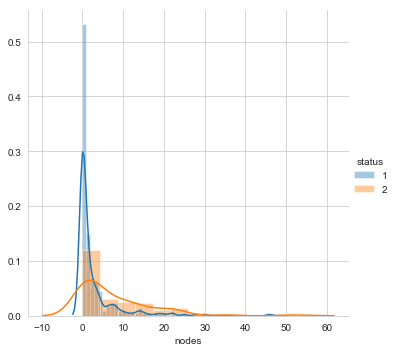

In [14]:
sns.FacetGrid(HMan, hue="status", size=5).map(sns.distplot, "nodes").add_legend();
plt.show()

**Conclusion**

- Patients with less auxilary nodes are more likely to survive.

## (1.4.3) CDF

PDF :  [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
Bin_edges :  [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
PDF :  [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
Bin_edges :  [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


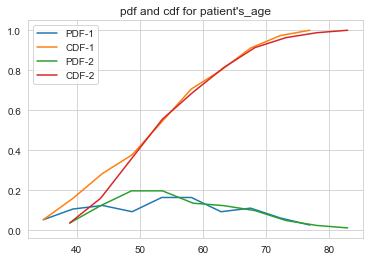

In [15]:
#CDF
counts, bin_edges = np.histogram(HMan_1['age'], bins=10, density = True)
pdf = counts/(sum(counts))
print('PDF : ',pdf)
print('Bin_edges : ',bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
#plt.legend(['PDF','CDF'])

counts, bin_edges = np.histogram(HMan_2['age'], bins=10, density = True)
pdf = counts/(sum(counts))
print('PDF : ',pdf)
print('Bin_edges : ',bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(['PDF-1','CDF-1','PDF-2','CDF-2'])
plt.title("pdf and cdf for patient's_age")

plt.show();

**Conclusion**
- Patients who are roughly 76 years of age or more survived for less than 5 years.
- 40% of the patients who surived for more than 5 years were aged below 50.
- 40% of the patients who surived for less than 5 years were aged below 50.

# (1.5) PDF vs CDF

PDF :  [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
Bin_edges :  [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF :  [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
Bin_edges :  [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


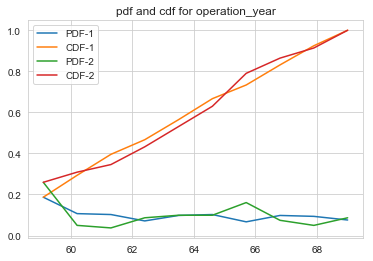

In [19]:
# PDF vs CDF for year of operation
counts, bin_edges = np.histogram(HMan_1['year'], bins=10, density = True)
pdf = counts/(sum(counts))
print('PDF : ',pdf)
print('Bin_edges : ',bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(HMan_2['year'], bins=10, density = True)
pdf = counts/(sum(counts))
print('PDF : ',pdf)
print('Bin_edges : ',bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(['PDF-1','CDF-1','PDF-2','CDF-2'])
plt.title("pdf and cdf for operation_year")

plt.show();

**Conclusion**
- The PDF and CDF of the operation year is almost the same so nothing can be concluded from it.

PDF :  [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
Bin_edges :  [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
PDF :  [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
Bin_edges :  [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


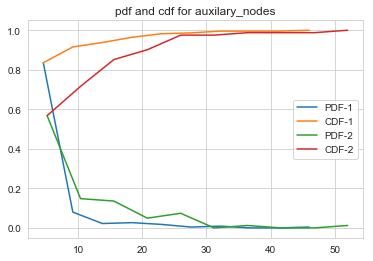

In [20]:
# PDF vs CDF of number of nodes found
counts, bin_edges = np.histogram(HMan_1['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print('PDF : ',pdf)
print('Bin_edges : ',bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(HMan_2['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print('PDF : ',pdf)
print('Bin_edges : ',bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(['PDF-1','CDF-1','PDF-2','CDF-2'])
plt.title("pdf and cdf for auxilary_nodes")

plt.show();

**Conclusion**
- Patients with roughly 45 or more auxilary nodes survived for less than 5 years.
- Roughly 95% of patients who survived for more than 5 yeras had 10 or less auxilary nodes.
- Roughly 95% of the patients who survived for less than 5 years had 20 or less auxilary nodes.

# (1.6) Boxplot

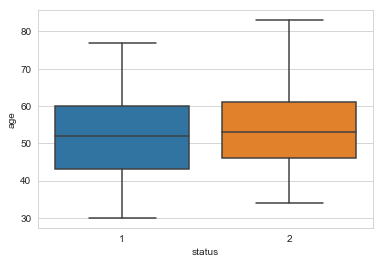

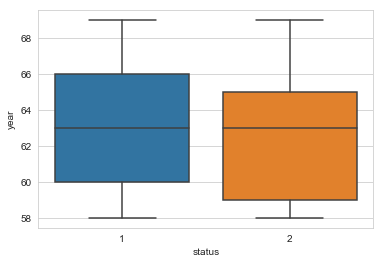

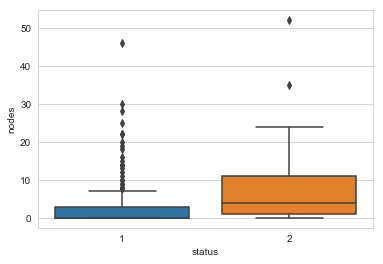

In [18]:
#Box Plot
sns.boxplot(x='status',y='age', data=HMan)
plt.show()
sns.boxplot(x='status',y='year', data=HMan)
plt.show()
sns.boxplot(x='status',y='nodes', data=HMan)
plt.show()

**Conclusions**
- The box-plot values of age and year data are overlapping for most of the part for both classes of patients, so age and year data do not reveal much about the survival status of the patient.
- For the patients who survived for more than 5 years, 75 percentile have 2 nodes and the values of 50 percentile and 25 percentile overlap.
- For the patients who survived less than 5 years, 25 percentile have 1 node, 50 percentile have 4 nodes and 75 percentile have 11 nodes. 


## (1.7) Violin Plot

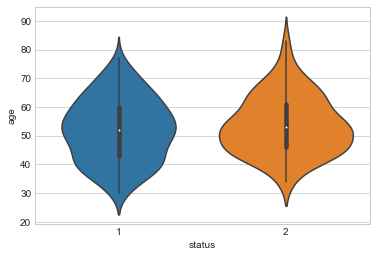

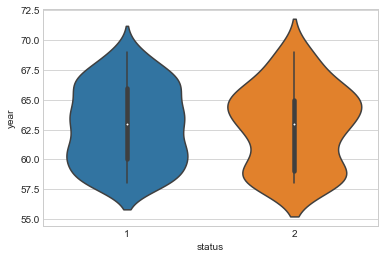

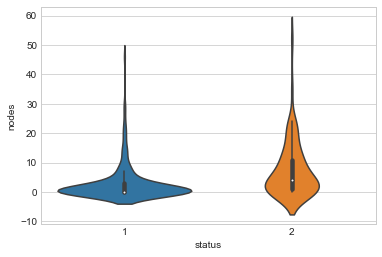

In [20]:
#Violin Plot
sns.violinplot(x='status',y='age', data=HMan)
plt.show()
sns.violinplot(x='status',y='year', data=HMan)
plt.show()
sns.violinplot(x='status',y='nodes', data=HMan)
plt.show()

**Conclusions**
- As age and year of operation for both classes of patients are similar, much cannot be inferred from the plot of these values.
- For the ptients who survived for more than 5 years, 75 percentile have 3 auxilary nodes and 50 percentile and 25 percentile kind of overlapp at 0 auxilary nodes.
- For the patients who survived for less than 5 years, 75 percentile have 11 auxilary nodes, 50 pecentile have 5 auxilary nodes and 25 percentile have 0 auxilary nodes.

# SUMMARY.
 - The feature such as age of patient and year of operation do not play a vital role in finding the survival status of the patient.
 - The number of auxilary nodes detected proved to be important feature to find the survival status of the patient.
 - Patients with less number of auxilary nodes have higher chances of surving for long.
 - To come to a better conclusion more attributes are required and the providd data seemed inadequite.